# **Data Science Nanodegree | Data Science Bog Project 1**

# 1.0 Introduction 

Using the CRISP-DM (Cross-Industry Standard Process for Data Mining) process, we take a look at exploring the 2019 [Stack Overflow Annual Developer Survey Data](https://insights.stackoverflow.com/survey).

These are the questions to be answered:

+ Where do the developers in the top 40 countries work from?
+ What operating systems are the most used by developers in the top 40 countries?
+ What is the employment type of developers in the top 40 countries?



# 2.0 Data Acquisition and Preparation

In [0]:
# Get all the necessary libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [185]:
# Load the data and view a snapshot
data = pd.read_csv("/content/drive/My Drive/stackoverflow developer_survey_2019/survey_results_public.csv")
data.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [186]:
# Get the dimension of the dataset
data.shape

(88883, 85)

In [187]:
# Get a sense of the columns in the dataset
data.columns[:]

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [188]:
# Get a sense of the columns with missing data by viewing all the number of responses
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [189]:
# identify the number of responses from the all countries in the dataset
data['Country'].count()

88751

In [190]:
# Determine the number of missing data in the 'Country' column
data['Country'].isnull().sum()

132

In [191]:
# Get the number of responses per country
resp_country = data['Country'].value_counts()
resp_country.head(40)

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Czech Republic          764
Romania                 760
Iran                    738
Belgium                 727
China                   664
Bulgaria                659
Mexico                  642
South Africa            627
Denmark                 617
Bangladesh              605
Norway                  574
Greece                  556
Argentina               553
Finland                 546
Portugal                525
New Zealand         

In [194]:
# As we desire to focus on respondents who claim to be develoeprs. we would 
# filter our dataset to only focus on our target audience
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

We would focus on those who said **'I am a developer by profession'** as they make the highest number of respondents in the survey data


In [195]:
# Create a new dataframe 'dev_data' to house all respondendts who said 'I am a developer by profession'
dev_data = data[data['MainBranch'] == 'I am a developer by profession']
dev_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,14,9,Very dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,No,I am not interested in new job opportunities,Less than a year ago,"Write any code;Write code by hand (e.g., on a ...",No,"Industry that I'd be working in;Languages, fra...",I was preparing for a job search,UAH,Ukrainian hryvnia,NaN,NaN,NaN,55.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,A few days each month,Office,A little above average,"Yes, because I see value in code review",NaN,...,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,Django;Express;Flask;jQuery;React.js;Spring,Flask;jQuery;React.js;Spring,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,Yes,Facebook,In real life (in person),Username,I don't remember,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,NaN,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am no

In [197]:
# Check if there are any missing data in the 'Country' column for the 'I am a developer by profession' respondents
dev_data['Country'].isna().sum()

0

In [198]:
# Get the dimension of the entries by fulltime developers
dev_data.shape

(65679, 85)

In [199]:
# Aggregate and group the total number of developers by country
dev_data['Country'].value_counts()

United States        16100
India                 6657
United Kingdom        4456
Germany               4244
Canada                2504
                     ...  
San Marino               1
Chad                     1
Brunei Darussalam        1
Botswana                 1
Gabon                    1
Name: Country, Length: 170, dtype: int64

# 3.0 Data Exploration

## 3.1 Developer Profile

### 3.1.1 Work Location of Developers in the Top 40 Countries

In [200]:
# Create a list with the developers from the top 40 countries and view the top 8
top_40_countries = list(dev_data['Country'].value_counts().head(40).index)
top_40_countries[:8]

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Brazil',
 'Poland']

In [201]:
# Assign all developers in the top 40 countries to a new dataframe dev_data_40
dev_data_40 = dev_data[dev_data['Country'].isin(top_40_countries)]
dev_data_40.shape

(58893, 85)

In [202]:
# Get a sense of any missing data in the Work Location column 'WorkLoc'
dev_data_40['WorkLoc'].isnull().sum()

2278

In [0]:
#Use the mode to fill in any missing data in the Work Location column 'WorkLoc'
dev_data_40['WorkLoc'] = dev_data_40['WorkLoc'].fillna(dev_data_40['WorkLoc'].mode()[0]);

In [204]:
# Check if there is still any missing data in the Work Location column 'WorkLoc'
dev_data_40['WorkLoc'].isnull().sum()

0

In [205]:
# Get a count of the locations where developers across the top 40 countries work from
dev_data_40['WorkLoc'].value_counts()

Office                                            35632
Home                                              18662
Other place, such as a coworking space or cafe     4599
Name: WorkLoc, dtype: int64

In [206]:
# Group the Work location 'WorkLoc' by countries and assign it to a new dataframe 'dev_data_40_aggregate'
dev_data_40_aggregate = dev_data_40.groupby(['Country', 'WorkLoc'], as_index=False)['Respondent'].count()
dev_data_40_aggregate

,Country,WorkLoc,Respondent
0,Argentina,Home,201
1,Argentina,Office,193
2,Argentina,"Other place, such as a coworking space or cafe",45
3,Australia,Home,470
4,Australia,Office,847
...,...,...,...
115,United Kingdom,Office,2690
116,United Kingdom,"Other place, such as a coworking space or cafe",288
117,United States,Home,6013
118,United States,Office,8879


In [207]:
# Sum all the repondednts by country in the top 40 countries and assign it to 'dev_data_40_sum'
dev_data_40_sum = dev_data_40['Country'].value_counts()

# Apply the function to add that to a new column 'Respondents Percentage' in 'dev_data_40_aggregate'
dev_data_40_aggregate['Respondent Percentage'] = dev_data_40_aggregate.apply(lambda x: x['Respondent'] / dev_data_40_sum[x['Country']], axis=1).round(3)
dev_data_40_aggregate[['Country', 'WorkLoc', 'Respondent Percentage']]

,Country,WorkLoc,Respondent Percentage
0,Argentina,Home,0.458
1,Argentina,Office,0.440
2,Argentina,"Other place, such as a coworking space or cafe",0.103
3,Australia,Home,0.328
4,Australia,Office,0.591
...,...,...,...
115,United Kingdom,Office,0.604
116,United Kingdom,"Other place, such as a coworking space or cafe",0.065
117,United States,Home,0.373
118,United States,Office,0.551


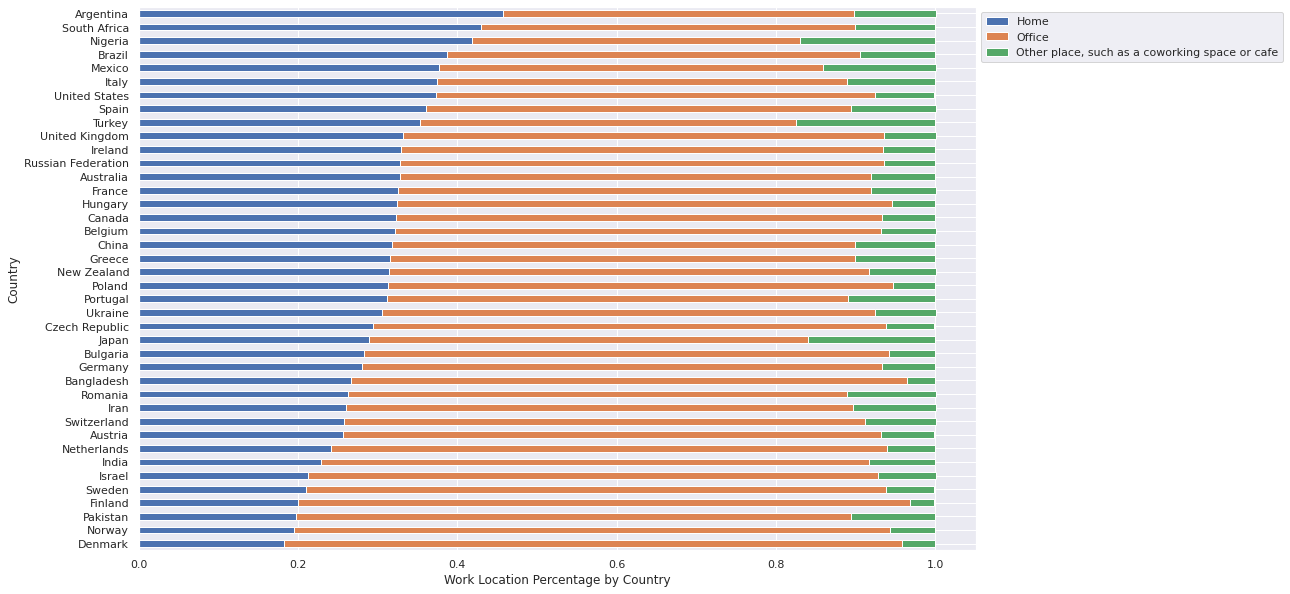

In [208]:
# We can now pivot the data
dev_data_pivot = pd.pivot(dev_data_40_aggregate, index='Country', values='Respondent Percentage', columns='WorkLoc').sort_values('Home', ascending=True)

# Next, we vsualize our data
dev_data_pivot.plot(kind='barh', stacked=True, figsize=(15, 10)) 
plt.legend(loc='upper left', bbox_to_anchor=(1,1));
plt.xlabel('Work Location Percentage by Country')
plt.show()

From our visualization, we see that **about 45% of developers in Argentina work from home and this is followed by South Africa and Nigeria**. While about **80% of developers in Denmark and Finland work from the 'office'**. Following this, **Japan, Turkey and Nigeria at 18% a piece have the highest number of developers who say they work in 'other place, such as a coworking space or cafe'**. 

## 3.2 Technology

### 3.2.1 Operating System Used By Developers in the Top 40 Countries

In [209]:
# Get a count of the operating systems used by developers in the top 40 countries
dev_data_40['OpSys'].value_counts()

Windows        26001
MacOS          17851
Linux-based    14532
BSD               56
Name: OpSys, dtype: int64

In [210]:
# Get a sense of the missing data in the operating system column 'OpSys'
dev_data_40['OpSys'].isnull().sum()

453

In [0]:
#Use the mode to fill in any missing data in the column 'OpSys'
dev_data_40['OpSys'] = dev_data_40['OpSys'].fillna(dev_data_40['OpSys'].mode()[0]);

In [212]:
# Check if there are any missing data in the operating system column 'OpSys'
dev_data_40['OpSys'].isnull().sum()

0

In [213]:
# Group the Operating System 'OpSys' used by developers across the top 40 countries
dev_data_40_aggregate_opsys = dev_data_40.groupby(['Country', 'OpSys'], as_index=False)['Respondent'].count()
dev_data_40_aggregate_opsys

,Country,OpSys,Respondent
0,Argentina,Linux-based,160
1,Argentina,MacOS,114
2,Argentina,Windows,165
3,Australia,BSD,1
4,Australia,Linux-based,280
...,...,...,...
136,United Kingdom,Windows,2147
137,United States,BSD,16
138,United States,Linux-based,3154
139,United States,MacOS,6355


In [214]:
# Create a function to get the percentage of respondents by country in the top 40 countries 
# Apply the function to add that to a new column 'Respondents Percentage' in the new dataframe 'dev_data_40_aggregate_opsys'
dev_data_40_aggregate_opsys['Respondent Percentage'] = dev_data_40_aggregate_opsys.apply(lambda x: x['Respondent'] / dev_data_40_sum[x['Country']], axis=1).round(3)
dev_data_40_aggregate_opsys[['Country', 'OpSys', 'Respondent Percentage']]

,Country,OpSys,Respondent Percentage
0,Argentina,Linux-based,0.364
1,Argentina,MacOS,0.260
2,Argentina,Windows,0.376
3,Australia,BSD,0.001
4,Australia,Linux-based,0.195
...,...,...,...
136,United Kingdom,Windows,0.482
137,United States,BSD,0.001
138,United States,Linux-based,0.196
139,United States,MacOS,0.395


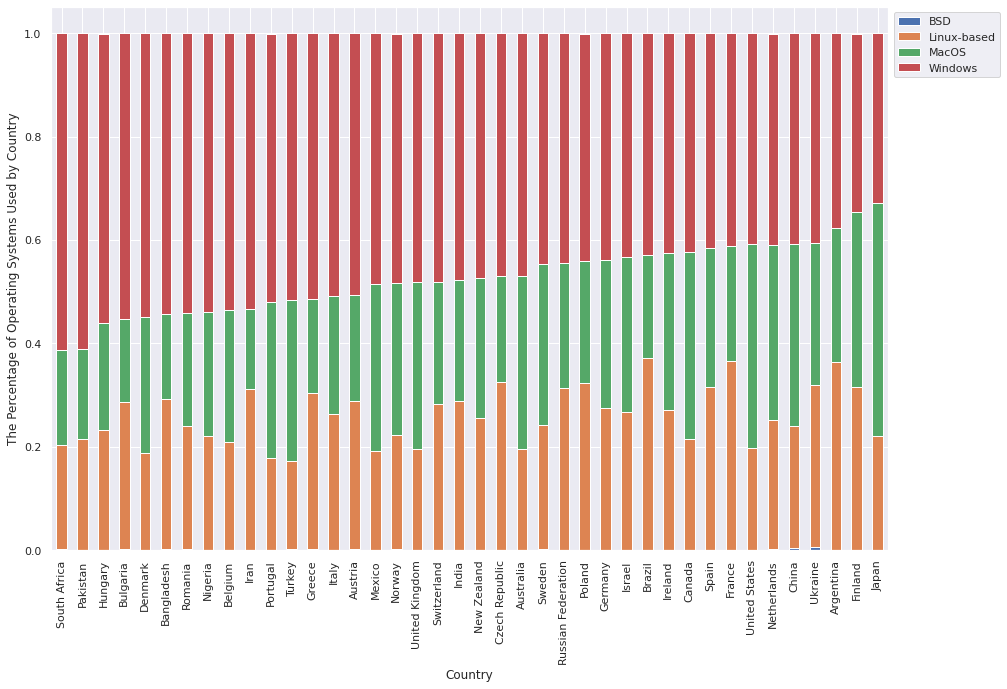

In [215]:
# We can now pivot the data
dev_data_pivot_opsys = pd.pivot(dev_data_40_aggregate_opsys, index='Country', values='Respondent Percentage', columns='OpSys').sort_values('Windows', ascending=False)

# Next, we vsualize our data
dev_data_pivot_opsys.plot(kind='bar', stacked=True, figsize=(15, 10)) 
plt.legend(loc='upper left', bbox_to_anchor=(1,1));
plt.ylabel('The Percentage of Operating Systems Used by Country')
plt.show()

The Windows operating system happens to be the most used from all the developers in the top 40 countries. **We see South Africa and Pakistan at 61% a piece leading the pack of developers who use the Windows operating system**. On the other hand, **developers from Japan lead in the use of the MacOS at about 45%**. In addition, **developers from Argentina, France and Brazil lead in the use of the Linux-based operating system at about 38% a piece**. Lastly, **the BSD operating system has a very small usage rate in Ukraine and China.**

## 3.3 Employment

### 3.3.1 Employment Type of Developers in the Top 40 Countries

In [216]:
# Get a count of the operating systems used by developers in the top 40 countries
dev_data_40['Employment'].value_counts()

Employed full-time                                      50075
Independent contractor, freelancer, or self-employed     5219
Employed part-time                                       2093
Not employed, but looking for work                       1009
Not employed, and not looking for work                    185
Retired                                                    51
Name: Employment, dtype: int64

In [217]:
# Get an idea of the missing data in the column 'Employment'
dev_data_40['Employment'].isna().sum()

261

In [0]:
#Use the mode to fill in any missing data in the column 'Employment'
dev_data_40['Employment'] = dev_data['Employment'].fillna(dev_data['Employment'].mode()[0]);

In [219]:
# Check if there are any missing data in the operating system column 'Employment'
dev_data_40['Employment'].isna().sum()

0

In [220]:
# Group the Empoyment Type 'Employment' of developers across the top 40 countries
dev_data_40_aggregate_emp = dev_data_40.groupby(['Country', 'Employment'], as_index=False)['Respondent'].count()
dev_data_40_aggregate_emp

,Country,Employment,Respondent
0,Argentina,Employed full-time,321
1,Argentina,Employed part-time,30
2,Argentina,"Independent contractor, freelancer, or self-em...",80
3,Argentina,"Not employed, but looking for work",8
4,Australia,Employed full-time,1210
...,...,...,...
200,United States,Employed part-time,296
201,United States,"Independent contractor, freelancer, or self-em...",959
202,United States,"Not employed, and not looking for work",45
203,United States,"Not employed, but looking for work",303


In [221]:
# Create a function to get the percentage of respondents by country in the top 40 countries 
# Apply the function to add that to a new column 'Respondents Percentage' in new dataframe 'dev_data_40_aggregate_emp'
dev_data_40_aggregate_emp['Respondent Percentage'] = dev_data_40_aggregate_emp.apply(lambda x: x['Respondent'] / dev_data_40_sum[x['Country']], axis=1).round(3)
dev_data_40_aggregate_emp[['Country', 'Employment', 'Respondent Percentage']]

,Country,Employment,Respondent Percentage
0,Argentina,Employed full-time,0.731
1,Argentina,Employed part-time,0.068
2,Argentina,"Independent contractor, freelancer, or self-em...",0.182
3,Argentina,"Not employed, but looking for work",0.018
4,Australia,Employed full-time,0.844
...,...,...,...
200,United States,Employed part-time,0.018
201,United States,"Independent contractor, freelancer, or self-em...",0.060
202,United States,"Not employed, and not looking for work",0.003
203,United States,"Not employed, but looking for work",0.019


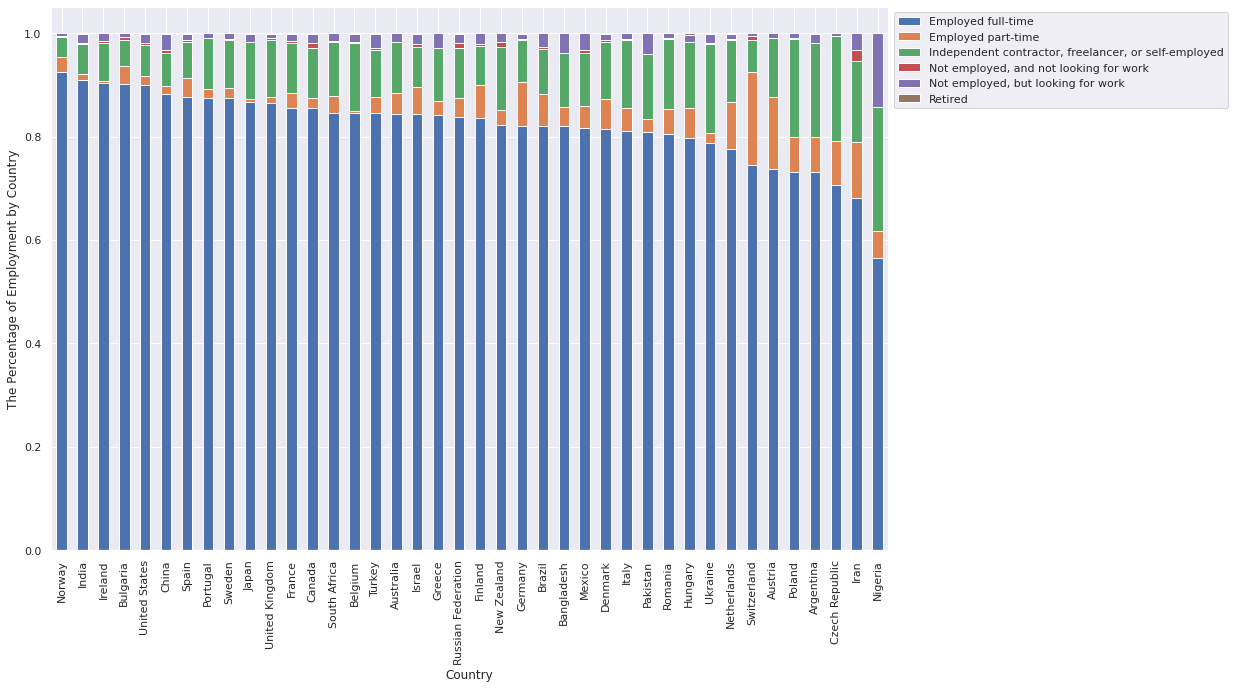

In [222]:
# We can now pivot the data
dev_data_pivot_emp = pd.pivot(dev_data_40_aggregate_emp, index='Country', values='Respondent Percentage', columns='Employment').sort_values('Employed full-time', ascending=False)

# Next, we vsualize our data
dev_data_pivot_emp.plot(kind='bar', stacked=True, figsize=(15, 10)) 
plt.legend(loc='upper left', bbox_to_anchor=(1,1));
plt.ylabel('The Percentage of Employment by Country')
plt.show()

From our visualization, we see that **most developers in the top 40 countries are 'employed full-time'**. Evidently, **Norway has the most developers who are employed full-time at about 95%.** This is closely followed by **India, Ireland and Bulgaria at about 90% of developers** who are empoyed full-time. The **lowest country with developers who are 'employed full-time' is Nigeria at about 58%**, and it has the **highest number at over 10% of developers who say they are 'not employed but looking for work'** from the survey. **Iran has the highest number of developers who say they are 'not employed, and not looking for work**'. Lastly, **Switzerland has the highest number of developers who are 'employed part-time'.**

# 4.0 Conclusion

In summary, the following conclusions can be drawn from our analysis of the 2019 Stack Overflow Developer Survey:

+ The **majority of developers work from the office** with Denmark and Finalnd having the highest number of developers who lay such claim. 
+ **Most developers say they use the Windows operating system**. Developers from South Africa and Pakistan lead in the percentage of develoeprs in this category.
+ On employment, we learn that **a substantial number of developers are 'employed full-time'**. The highest is Norway at about 95% and the lowest is Nigeria at about 58% who fall under this category'.
